In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately

train = pd.read_csv('E:/GreyAtom/glab proj/FIFA/train.csv')
#train_data.head(10)
train.head(10)

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB
5,3959,Hervías,24,Spain,72,77,Real Valladolid,4.20,0.012,RM
6,11496,D. George,19,Netherlands,64,74,FC Twente,0.70,0.002,RM
7,10773,C. Bassogog,21,Cameroon,65,72,NaN,0.00,0.000,ST
8,6989,B. Guillaume,22,Belgium,68,74,Angers SCO,1.20,0.013,ST
9,1731,S. Pérez,24,Colombia,75,80,Boca Juniors,9.00,0.020,CDM


In [3]:
# Shape of the data
print("Shape of the data is:", train.shape)

Shape of the data is: (14384, 10)


In [4]:
#Checking statistical properties of data
print("Statistical properties of data are as follows")
print(train.describe())

Statistical properties of data are as follows
                 Id           Age       Overall     Potential     Value (M)  \
count  14384.000000  14384.000000  14384.000000  14384.000000  14384.000000   
mean    8992.892728     25.148776     66.237695     71.181869      2.344967   
std     5183.996368      4.620911      6.954458      6.074111      5.105376   
min        0.000000     16.000000     46.000000     46.000000      0.000000   
25%     4480.750000     21.000000     62.000000     67.000000      0.300000   
50%     9001.500000     25.000000     66.000000     71.000000      0.675000   
75%    13470.250000     28.000000     71.000000     75.000000      2.100000   
max    17980.000000     47.000000     94.000000     94.000000    105.000000   

           Wage (M)  
count  14384.000000  
mean       0.011435  
std        0.022614  
min        0.000000  
25%        0.002000  
50%        0.004000  
75%        0.012000  
max        0.565000  


In [5]:
print("Skewness for different features is shown as below")
print(train.skew())

Skewness for different features is shown as below
Id          -0.000627
Age          0.387514
Overall     -0.006657
Potential    0.204984
Value (M)    6.597601
Wage (M)     7.382001
dtype: float64


In [7]:
# Split into features and target
X = train[['Id','Overall','Potential','Wage (M)']]
y = train['Value (M)']

In [8]:
#Reading features (X)
X.head(10)

,Id,Overall,Potential,Wage (M)
0,17221,54,58,0.001
1,11353,64,73,0.010
2,3402,72,79,0.013
3,16071,57,66,0.002
4,12380,63,75,0.002
5,3959,72,77,0.012
6,11496,64,74,0.002
7,10773,65,72,0.000
8,6989,68,74,0.013
9,1731,75,80,0.020


In [9]:
#Reading Target (y)
y.head(10)

0    0.07
1    0.70
2    3.70
3    0.16
4    0.55
5    4.20
6    0.70
7    0.00
8    1.20
9    9.00
Name: Value (M), dtype: float64

In [10]:
# Separate into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.3,random_state=6)

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

In [11]:
# Code Starts here

#Checking the best plots for plotting between continuous features and try making some inferences from these plots.

cols = X_train.columns
print("Below columns are present in dataset:")
print(cols)


Below columns are present in dataset:
Index(['Id', 'Overall', 'Potential', 'Wage (M)'], dtype='object')


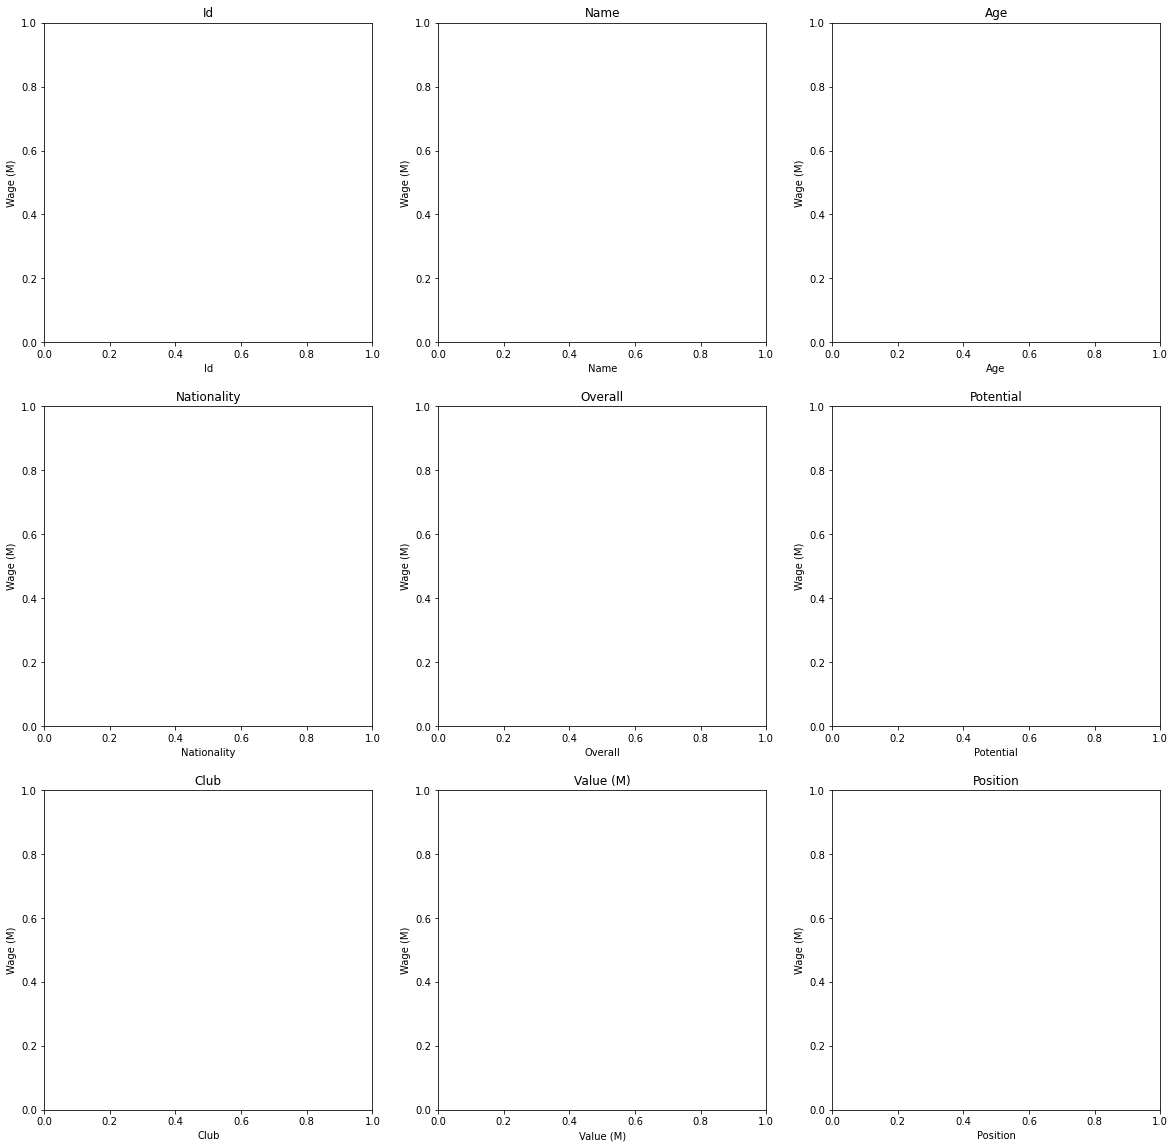

In [13]:
# fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20,20))

# for i in range(0,3):
#     for j in range(0,3):
#         col = cols[i*3 + j]
#         axes[i,j].set_title(col)
#         #axes[i,j].scatter(X_train[col],y_train)
#         axes[i,j].set_xlabel(col)
#         axes[i,j].set_ylabel('Wage (M)')
        
# plt.show()

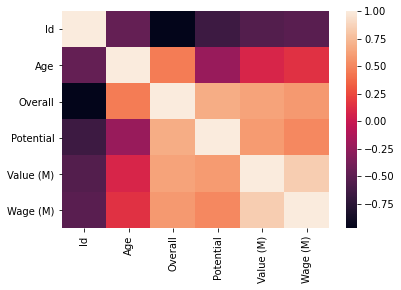

In [12]:
#Feature Selection

#selecting suitable threshold and dropping columns

# Plotting a heatmap using to check for correlation between the features
sns.heatmap(train.corr())

In [13]:
# Selecting upper and lower threshold

upper_threshold = 0.5
lower_threshold = -0.5

# List the correlation pairs
correlation = train.corr().unstack().sort_values(kind='quicksort')
correlation

Id         Overall     -0.975595
Overall    Id          -0.975595
Id         Potential   -0.653503
Potential  Id          -0.653503
Id         Value (M)   -0.548213
Value (M)  Id          -0.548213
Id         Wage (M)    -0.519570
Wage (M)   Id          -0.519570
Id         Age         -0.463232
Age        Id          -0.463232
           Potential   -0.224055
Potential  Age         -0.224055
Age        Value (M)    0.082716
Value (M)  Age          0.082716
Wage (M)   Age          0.149757
Age        Wage (M)     0.149757
           Overall      0.459678
Overall    Age          0.459678
Potential  Wage (M)     0.512910
Wage (M)   Potential    0.512910
Overall    Wage (M)     0.589736
Wage (M)   Overall      0.589736
Potential  Value (M)    0.595095
Value (M)  Potential    0.595095
Overall    Value (M)    0.635618
Value (M)  Overall      0.635618
Overall    Potential    0.678228
Potential  Overall      0.678228
Wage (M)   Value (M)    0.845124
Value (M)  Wage (M)     0.845124
Id        

In [14]:
# Select the highest correlation pairs having correlation greater than upper threshold and lower than lower threshold
corr_var_list = correlation[((correlation>upper_threshold) | (correlation<lower_threshold)) & (correlation!=1)]
print(corr_var_list)

Id         Overall     -0.975595
Overall    Id          -0.975595
Id         Potential   -0.653503
Potential  Id          -0.653503
Id         Value (M)   -0.548213
Value (M)  Id          -0.548213
Id         Wage (M)    -0.519570
Wage (M)   Id          -0.519570
Potential  Wage (M)     0.512910
Wage (M)   Potential    0.512910
Overall    Wage (M)     0.589736
Wage (M)   Overall      0.589736
Potential  Value (M)    0.595095
Value (M)  Potential    0.595095
Overall    Value (M)    0.635618
Value (M)  Overall      0.635618
Overall    Potential    0.678228
Potential  Overall      0.678228
Wage (M)   Value (M)    0.845124
Value (M)  Wage (M)     0.845124
dtype: float64


### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [15]:
# Code Starts here

#Instantiate linear regression model
regressor = LinearRegression()

# fit the model
regressor.fit(X_train,y_train)

# predict the result
y_pred = regressor.predict(X_test)
y_pred


array([ 1.26099907,  3.14936449, -0.55005494, ...,  1.46226832,
        1.58204067,  1.58681915])

In [16]:
# Calculate mse
mse = mean_squared_error(y_test,y_pred)
mse

5.73269028105946

In [17]:
# Calculate r2_score
r2 = r2_score(y_test,y_pred)
r2

0.788209191897524

Residual :  13328   -0.685999
2639    -2.859364
5353     0.750055
13126   -5.949938
5554    -1.144565
           ...   
10011   -0.846442
12592   -0.321063
3598    -0.687268
13385   -0.707041
8482    -0.486819
Name: Value (M), Length: 4316, dtype: float64


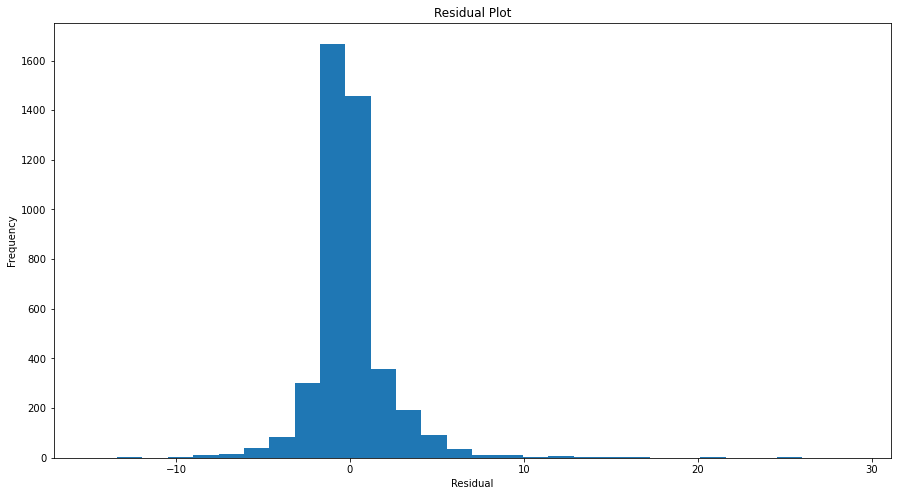

In [18]:
#Residual Check
residual = y_test - y_pred
print("Residual : ",residual)

plt.figure(figsize=(15,8))
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Plot")
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [23]:
# Code Starts here


test = pd.read_csv("E:/GreyAtom/glab proj/FIFA/test.csv")
test.head(10)



,Id,Name,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,280,C. Vela,28,Mexico,82,82,Real Sociedad,0.046,ST
1,569,J. Stones,23,England,79,85,Manchester City,0.105,CB
2,8731,V. Vermeij,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,10085,G. Omae,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,9831,N. Miatke,27,Germany,66,67,FSV Zwickau,0.001,LM
5,7346,T. Şahin,29,Turkey,68,68,Evkur Yeni Malatyaspor,0.010,RM
6,10496,J. Fabri,23,France,65,73,Stade Brestois 29,0.001,GK
7,8318,O. Aydın,23,Germany,67,75,Chemnitzer FC,0.001,LM
8,17589,A. Al Yousif,19,Saudi Arabia,52,62,Al Fateh,0.002,CB
9,3615,Clayton Fildeiras,33,Brazil,72,72,Sociedade Esportiva Palmeiras,0.023,CM


In [24]:
id_ = test['Id']

test.drop(['Name','Age', 'Nationality', 'Club', 'Position'],1,inplace=True)
test.head()

,Id,Overall,Potential,Wage (M)
0,280,82,82,0.046
1,569,79,85,0.105
2,8731,67,74,0.007
3,10085,65,65,0.002
4,9831,66,67,0.001


In [25]:
y_pred_test = regressor.predict(test)
y_pred_test

array([12.5740973 , 19.59949247,  2.39904853, ...,  1.10472343,
       13.75395161,  5.19572246])

In [26]:
final_submission = pd.DataFrame({'Id':id_,'Value (M)':y_pred_test})
final_submission.head(10)

,Id,Value (M)
0,280,12.574097
1,569,19.599492
2,8731,2.399049
3,10085,0.170749
4,9831,0.764772
5,7346,1.646347
6,10496,1.410217
7,8318,1.376669
8,17589,-3.189105
9,3615,3.886411


In [27]:
final_submission.to_csv('final_submission.csv',index=False)